In [3]:
import pandas as pd

In [4]:
total_trips = 0
total_direct = 0
total_single_transfer = 0
total_multiple_transfers = 0

total_close = 0
total_close_direct = 0
total_close_single = 0
total_close_multiple = 0

In [5]:
for i in xrange(1,13):
    print i
    trip_data = pd.read_csv('../Data/Analyzed/trip_data_analyzed%d.csv'%i,usecols=['dist_start','dist_end','num_transfers'])
    
    total_trips += len(trip_data)
    close_groups = trip_data[(trip_data['dist_start']<0.25) & (trip_data['dist_end']<0.25)].groupby('num_transfers').size()
    far_groups = trip_data[(trip_data['dist_start']>=0.25) | (trip_data['dist_end']>=0.25)].groupby('num_transfers').size()
    
    total_direct += close_groups['direct'] + far_groups['direct']
    total_single_transfer += close_groups['single transfer'] + far_groups['single transfer']
    total_multiple_transfers += close_groups['multiple transfers'] + far_groups['multiple transfers']
    
    total_close_direct += close_groups['direct']
    total_close_single += close_groups['single transfer']
    total_close_multiple += close_groups['multiple transfers']
    total_close += close_groups.sum()

1
2
3
4
5
6
7
8
9
10
11
12


In [6]:
direct_pct = float(total_direct)/float(total_trips)*100
single_pct = float(total_single_transfer)/float(total_trips)*100
multiple_pct = float(total_multiple_transfers)/float(total_trips)*100
total_pcts = [direct_pct,single_pct,multiple_pct]

In [7]:
close_pct = float(total_close)/float(total_trips)*100
total_far = total_trips - total_close
far_pct = float(total_far)/float(total_trips)*100
distance_pcts = [close_pct,far_pct]

In [8]:
close_direct_pct = float(total_close_direct)/float(total_trips)*100
close_single_pct = float(total_close_single)/float(total_trips)*100
close_multiple_pct = float(total_close_multiple)/float(total_trips)*100
close_pcts = [close_direct_pct,close_single_pct,close_multiple_pct]

In [9]:
print '''
Total number of trips that do not require a transfer:       %d \t %2.1f %%
Total number of trips that only require a single transfer:  %d \t %2.1f %%
Total number of trips that require multiple transfers:      %d \t %2.1f %%
'''%(total_direct,direct_pct,
     total_single_transfer,single_pct,
     total_multiple_transfers,multiple_pct)


Total number of trips that do not require a transfer:       927771 	 22.1 %
Total number of trips that only require a single transfer:  2424720 	 57.7 %
Total number of trips that require multiple transfers:      847435 	 20.2 %



In [10]:
print '''
Total number of trips that start and end close to a station:  %d \t %2.1f %%
Total number of trips that start or end far from a station:  %d \t %2.1f %%
'''%(total_close,close_pct,total_far,far_pct)


Total number of trips that start and end close to a station:  2438491 	 58.1 %
Total number of trips that start or end far from a station:  1761435 	 41.9 %



In [11]:
print '''
For "close" trips (starting and ending within 0.25 miles of a station):
Total number of trips that do not require a transfer:       %d \t %2.1f %%
Total number of trips that only require a single transfer:  %d \t %2.1f %%
Total number of trips that require multiple transfers:      %d \t %2.1f %%
'''%(total_close_direct,close_direct_pct,
     total_close_single,close_single_pct,
     total_close_multiple,close_multiple_pct)


For "close" trips (starting and ending within 0.25 miles of a station):
Total number of trips that do not require a transfer:       513892 	 12.2 %
Total number of trips that only require a single transfer:  1451606 	 34.6 %
Total number of trips that require multiple transfers:      472993 	 11.3 %



In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

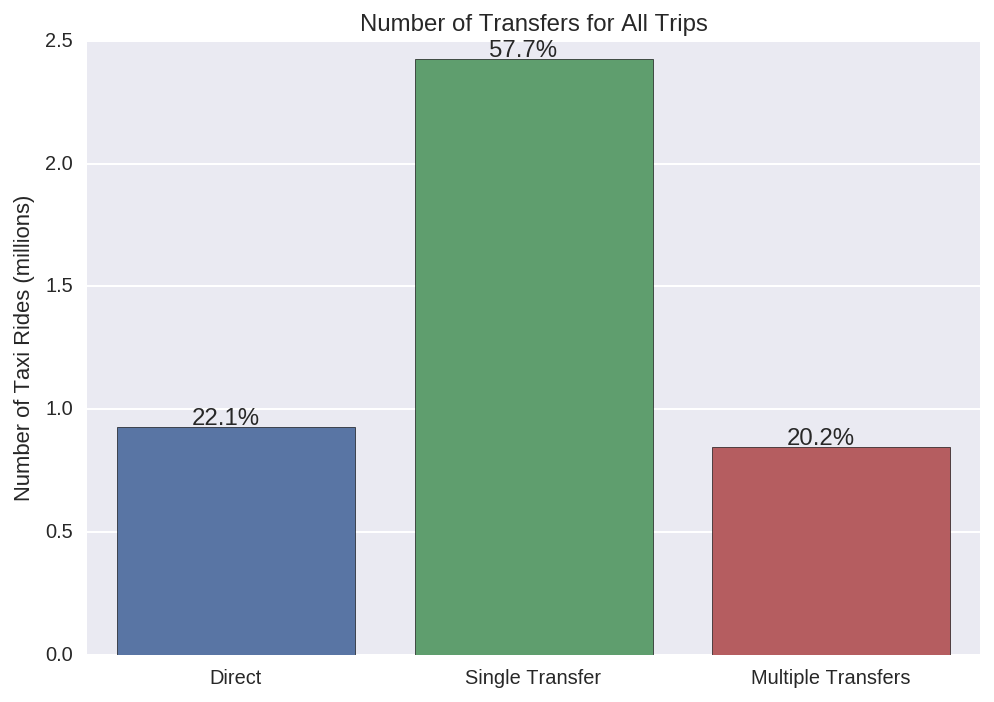

In [22]:
scale = 1000000.
g = sns.barplot(x=['Direct','Single Transfer','Multiple Transfers'],y=[total_direct/scale,total_single_transfer/scale,total_multiple_transfers/scale])
g.set_title('Number of Transfers for All Trips')
g.set_ylabel('Number of Taxi Rides (millions)')
i=0
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+0.25, height+0.01, '%1.1f%%'%(total_pcts[i]))
    i=i+1
plt.savefig('../Plots/num_transfers.png')

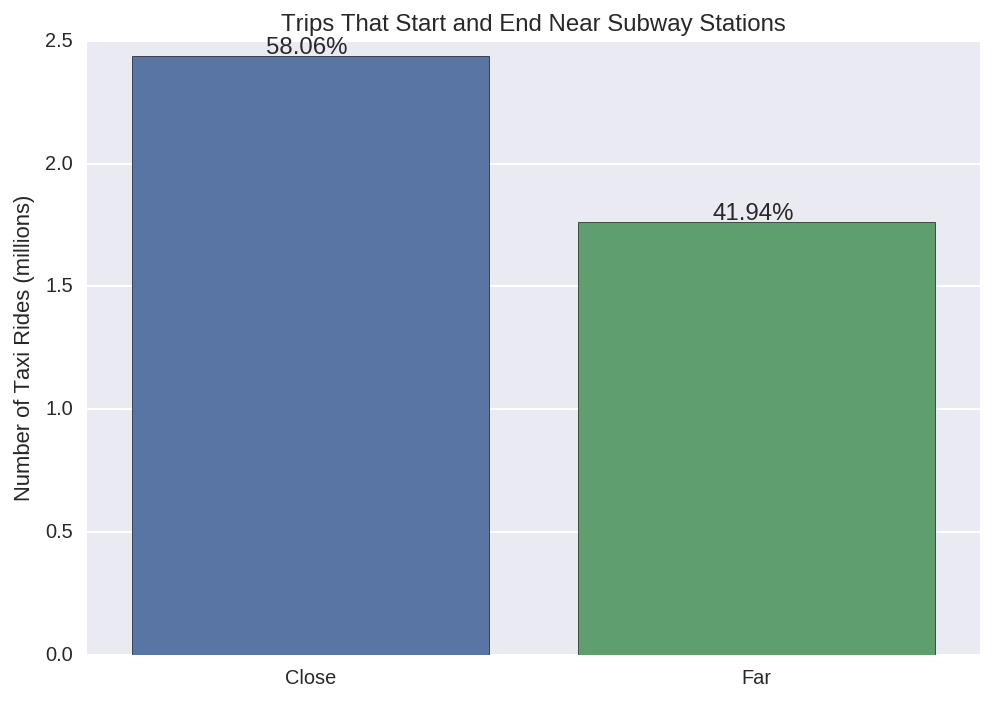

In [23]:
scale = 1000000.
g = sns.barplot(x=['Close','Far'],y=[total_close/scale,total_far/scale])
g.set_title('Trips That Start and End Near Subway Stations')
g.set_ylabel('Number of Taxi Rides (millions)')
i=0
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+0.3, height+0.01, '%1.2f%%'%(distance_pcts[i]))
    i=i+1
plt.savefig('../Plots/close_or_far.png')

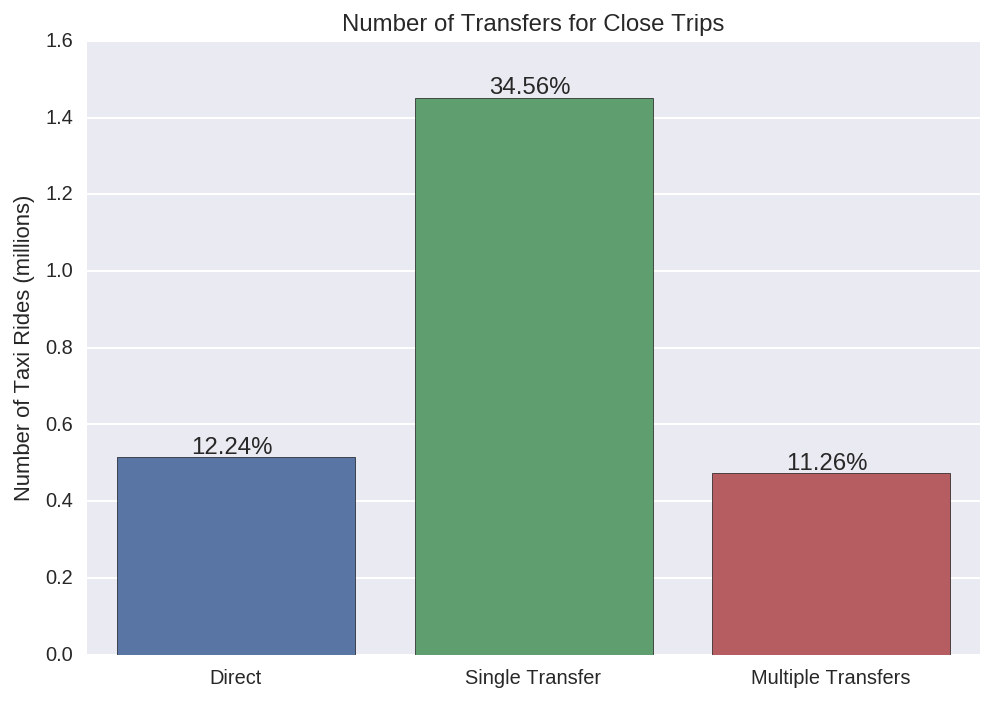

In [25]:
scale = 1000000.
g = sns.barplot(x=['Direct','Single Transfer','Multiple Transfers'],y=[total_close_direct/scale,total_close_single/scale,total_close_multiple/scale])
g.set_title('Number of Transfers for Close Trips')
g.set_ylabel('Number of Taxi Rides (millions)')
i=0
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+0.25, height+0.01, '%1.2f%%'%(close_pcts[i]))
    i=i+1
plt.savefig('../Plots/num_transfers_close.png')